### Navigating Complex Symptoms

### Install Libraries

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


### Download the data

In [40]:
# Replace with the path to your downloaded dataset
df = pd.read_excel('lyme_disease_diagnosis_dataset.xlsx')


### Feature Engineering

In [41]:
print(df.head())
print(df.describe())


# Convert 'Yes'/'No' columns to binary (1/0)
binary_columns = ['JointPain', 'SkinRash', 'Fatigue', 'TickBiteHistory', 'TravelHistoryToTickProneAreas', 'LymeDisease']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Split the data into a training set and a test set
X = df.drop('LymeDisease', axis=1)  # Features
y = df['LymeDisease']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


   PatientID  Age JointPain SkinRash Fatigue TickBiteHistory  \
0          1   70       Yes       No      No             Yes   
1          2   23       Yes       No     Yes              No   
2          3   47        No       No      No             Yes   
3          4   45       Yes      Yes      No              No   
4          5   65        No       No     Yes             Yes   

  TravelHistoryToTickProneAreas  DurationOfSymptoms LymeDisease  
0                           Yes                   1          No  
1                           Yes                  11          No  
2                            No                  10          No  
3                            No                  12          No  
4                           Yes                  10          No  
        PatientID        Age  DurationOfSymptoms
count  100.000000  100.00000          100.000000
mean    50.500000   44.72000            6.540000
std     29.011492   16.47654            3.412455
min      1.000000   18.

### Define and Build the Model

In [42]:
# Define the decision tree model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier()

### Visualize the Results

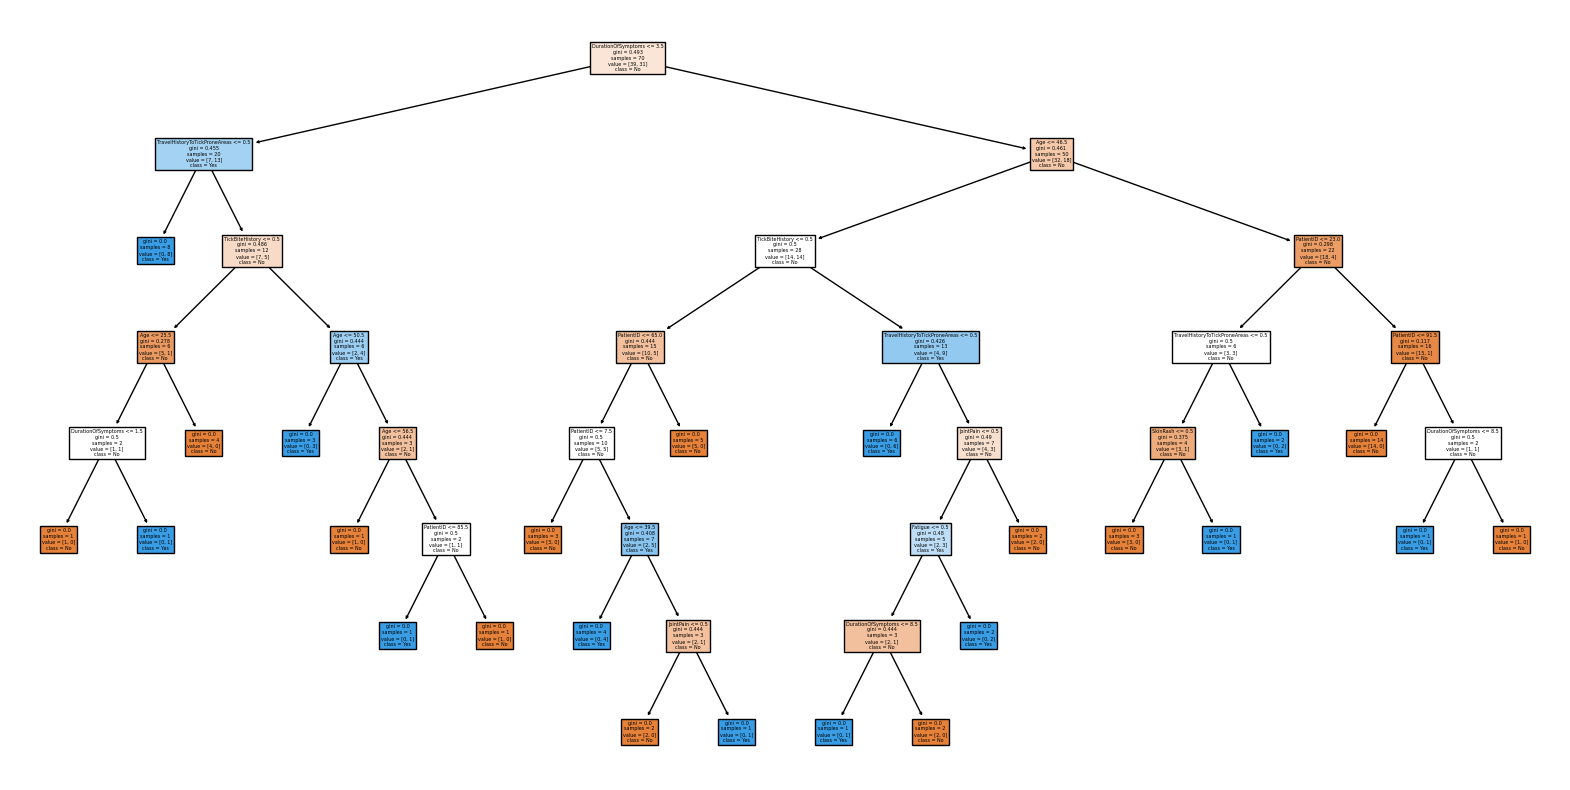

In [46]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.show()




### Interpret the Results

In [44]:
# Evaluate the model using the test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.31      0.33      0.32        12
           1       0.53      0.50      0.51        18

    accuracy                           0.43        30
   macro avg       0.42      0.42      0.42        30
weighted avg       0.44      0.43      0.44        30

Accuracy Score: 0.43333333333333335


Notes:

The code assumes that categorical columns like 'JointPain', 'SkinRash', etc., are represented as 'Yes' or 'No' in the dataset and converts them into binary (1/0) format.

The script uses a basic decision tree classifier without hyperparameter tuning. For a real-world application, you may need to tune the model for better performance.

Visualization of the tree might become complex if the tree is too large. Consider simplifying the tree or focusing on specific parts for detailed analysis.

The dataset is assumed to be balanced. If it's imbalanced, you may need to consider techniques like SMOTE for oversampling or adjust the class weight parameter in the decision tree classifier.